# Project: Wrangling and Analyze Data
## WeRateDog Twitter Archive
## Introduction

Using Python and its libraries, data from a variety of sources will be gathered in a variety of formats, and data wrangling will be performed on the different dataset. Data wrangling means assessing data for its quality and tidiness and the cleaning of data before use.

In [1]:
#Import the required packages
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns

## Data Gathering
All the three pieces of data required for this project will be dowloaded here and loaded into the notebook.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#download the tweet image prediction using the request library
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image_predictions.tsv', mode='wb') as file:
    file.write(r.content)

In [4]:
#read in the image_predictions.tsv as a dataframe(image_predictions)
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
consumer_key = '***********************'
consumer_secret = '********************'
access_token = '***********************'
access_secret = '**********************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
tweet_ids = twitter_archive_enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [5]:
# read all tweets from txt file to DataFrame
tweet_json = pd.DataFrame()

# open text file
with open('tweet_json.txt', encoding='utf8', mode='r') as json_file:
    
    # iterate through each line
    for line in json_file:
        
        # read each json line into a dictionary
        tweet = json.loads(line)
        
        # add the id, favorite_count, and retweet_count into a DataFrame
        line_df = pd.DataFrame.from_records([{'tweet_id': tweet['id'], 
                                              'favorite_count': tweet['favorite_count'], 
                                              'retweet_count': tweet['retweet_count']}])
        
        # append the row to the tweet_json DataFrame
        tweet_json = tweet_json.append(line_df)
#Save the tweet_json dataset as a csv file.
tweet_json.reset_index(drop=True, inplace=True)
tweet_json.to_csv('tweet_json.csv', index=False)

## Assessing Data
In this section, eight (8) quality issues and two (2) tidiness issues were detected and documented using both visual assessment and programmatic assessement.

### Visual Assesment

In [6]:
#View the twitter_archive_enhanced dataframe, and visually assess it
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
#View the image_predictions dataframe, and visually assess it
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
#View the tweet_json dataframe, and visually assess it.
tweet_json

,favorite_count,retweet_count,tweet_id
0,33710,6975,892420643555336193
1,29237,5276,892177421306343426
2,21983,3466,891815181378084864
3,36809,7197,891689557279858688
4,35192,7721,891327558926688256
5,17754,2589,891087950875897856
6,10336,1648,890971913173991426
7,56686,15689,890729181411237888
8,24433,3605,890609185150312448
9,27860,6074,890240255349198849


### Programmatic assesment

In [9]:
#Check for the numbers of rows and columns in twitter_archive_enhanced
twitter_archive_enhanced.shape

(2356, 17)

In [10]:
#Assess for the variables datatypes, number of columns and observation and other brief information on the dataframe.
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
#Assess for duplicated observations(rows)
twitter_archive_enhanced.duplicated().sum()

0

In [12]:
#Check for the presence of null values
twitter_archive_enhanced.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [13]:
#Compute summary statistics on the numerical variables.
twitter_archive_enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
#Check for instances where the rating_numerator is less than 10 and greater than 14(Closer to the mean)
print(len(twitter_archive_enhanced.query('rating_numerator < 10 or rating_numerator >20')))

twitter_archive_enhanced.query('rating_numerator < 10 or rating_numerator >20')

464


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None


In [15]:
print(len(twitter_archive_enhanced.query('rating_denominator < 10 or rating_denominator > 10')))


twitter_archive_enhanced.query('rating_denominator < 10 or rating_denominator > 11')

23


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [16]:
#Assess the 'source' column
twitter_archive_enhanced.source.head(3)

0    <a href="http://twitter.com/download/iphone" r...
1    <a href="http://twitter.com/download/iphone" r...
2    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [17]:
#Check for the numbers of rows and columns in image_predictions
image_predictions.shape

(2075, 12)

In [18]:
#Assess for the variables datatypes, number of columns and observation and other brief information on the dataframe.
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
#Check for missing observations in each column
image_predictions.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [20]:
#Check for duplicates
image_predictions.duplicated().sum()

0

In [21]:
#Check for the numbers of rows and columns in tweet_json
tweet_json.shape

(2327, 3)

In [22]:
#Assess for the variables datatypes, number of columns and observation and other brief information on the dataframe.
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
tweet_id          2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [23]:
#Check for missing observations in each column
tweet_json.isna().sum()

favorite_count    0
retweet_count     0
tweet_id          0
dtype: int64

In [24]:
#Assess for duplicated observations(rows)
tweet_json.duplicated().sum()

0

In [25]:
#Compute summary statistics on the numerical variables.
tweet_json.describe()

,favorite_count,retweet_count,tweet_id
count,2327.000000,2327.000000,2.327000e+03
mean,7030.283627,2460.068758,7.417930e+17
std,10924.800392,4166.219582,6.820795e+16
min,0.000000,1.000000,6.660209e+17
25%,1221.000000,492.500000,6.781394e+17
50%,3039.000000,1144.000000,7.178418e+17
75%,8569.000000,2846.000000,7.986547e+17
max,144332.000000,70374.000000,8.924206e+17


### Quality issues
1. There are many unwanted columns in twitter_archive_enhanced such as in_reply_to_status_id, in_reply_to_user_id, expanded_urls.

2. Drop all retweeted columns as we want only the original tweets (retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp).

3. From the summary statistics, it can be observed that the rating_numerator and rating_denominator have outliers. It has been stated in the project introduction that the denominator are almost always 10 (mean = 10.5), and the numerator are always greater than 10(mean is 13.13).

4. There are unneccesary columns in the image_predictions dataframe, only the column with tweet Id and correct dog breed is needed. Also, the p1 needs to be renamed.

5. The source column need to be modified. It contains the source url. Only the source needed.

6. Timestamp does not have the correct data type.

7. The dog name column contains incorrect dog names such as a, an, none, etc.

8. The tweet id in the 3 data frame has the wrong datatype (integer).

### Tidiness issues
1. The doggo, floofer, pupper and puppo should be in one column in the twitter_archive_enhanced column

2. The tweet_json, image_predictions, and twitter_archived_enhanced dataframe should be in one table

## Cleaning Data
All the issues documented while assessing will be cleaned here. Copies of each dataset will be made to preserve the original copies.

In [26]:
# Make copies of original pieces of data
tweet_copy = twitter_archive_enhanced.copy()
img_copy = image_predictions.copy()
json_copy = tweet_json.copy()  

### Issue #1: 
> There are many unwanted columns in twitter_archive_enhanced such as in_reply_to_status_id, in_reply_to_user_id, and expanded_urls.

#### Define 
> Use the drop method to remove unwanted columns (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, expanded_urls, and retweeted_status_timestamp) in the tweet_copy dataframe

#### Code

In [27]:
#Drop unwanted columns
tweet_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 
                 'expanded_urls'], axis = 1, inplace = True)

#### Test

In [28]:
tweet_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Issue #2: 
>Drop all retweeted columns as we want only the original tweets (retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp).

#### Define
> Use the drop method to remove retweeted columns (retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp) in the tweet_copy dataframe.

#### Code

In [29]:
#Drop retweeted columns
tweet_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 
                 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [30]:
tweet_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #3: 
> From the summary statistics, it can be observed that the rating_numerator and rating_denominator have outliers. It has been stated in the project introduction that the denominator are almost always 10 (mean = 10.5), and the numerator are always greater than 10(mean is 13.13).

#### Define
Drop any rows with rating numerator less than 10 and greater than 20 
Drop rows with rating denominator greater than 11  and less than 10.

#### Code

In [31]:
#Dropping rows with ouliers
tweet_copy.drop(tweet_copy.query('rating_denominator < 10 or rating_denominator > 11').index, axis = 0, inplace=True)
tweet_copy.drop(tweet_copy.query('rating_numerator < 10 or rating_numerator > 20').index, axis = 0, inplace=True)

#### Test

In [32]:
#Check for the new minimum and maximum values and other descriptive stats of rating numerator and 
#denominator to check if they no more contain outliers
tweet_copy.describe()

,tweet_id,rating_numerator,rating_denominator
count,1.890000e+03,1890.000000,1890.0
mean,7.550050e+17,11.515873,10.0
std,6.899311e+16,1.144421,0.0
min,6.660508e+17,10.000000,10.0
25%,6.874774e+17,11.000000,10.0
50%,7.490698e+17,12.000000,10.0
75%,8.146114e+17,12.000000,10.0
max,8.924206e+17,17.000000,10.0


### Issue #4:
> There are unneccesary columns in the image_predictions dataframe, only the column with tweet Id and correct dog breed is needed. Also, the p1 needs to be renamed.

#### Define
> Remove unnecesary columns from the image_predictions dataframe by filtering for the dog breed with highest confidence level and correct dog breed type, and rename the p1 column to dog_breed

#### Code

In [33]:
#filtering for the dog breeds with highest confidence level 
img_copy.drop(img_copy.query('p1_dog== False').index, axis = 0, inplace=True)
#Drop unnecesary columns

img_copy.drop(['jpg_url','img_num','p1_dog', 'p1_conf', 'p2',
              'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace=True)

#Rename the p1 column to dog_breed
img_copy.rename(columns={'p1':'dog_breed'}, inplace=True)

#### Test

In [34]:
img_copy.head()

,tweet_id,dog_breed
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd
3,666044226329800704,Rhodesian_ridgeback
4,666049248165822465,miniature_pinscher


### Issue #5: 
> The source column need to be modified because It contains the full source url. Only the source is needed.

#### Define
> Strip the preceeding word in the url to get only the specific source.

#### Code

In [35]:
# define function
def strip_url(x):
    
    #Split using the split method
    return x.split('>', 1)[-1][:-4]

#apply the function
tweet_copy['source'] = tweet_copy['source'].apply(strip_url)

#### Test

In [36]:
tweet_copy.source.sample(10)

1416     Twitter for iPhone
256      Twitter for iPhone
1319     Twitter for iPhone
390      Twitter for iPhone
161      Twitter for iPhone
422      Twitter for iPhone
957      Twitter for iPhone
714     Vine - Make a Scene
1169     Twitter for iPhone
691      Twitter for iPhone
Name: source, dtype: object

### Issue #6:
> Timestamp does not have the correct data type.

#### Define
> Convert the data type of the timestamp column to datetime

#### Code

In [37]:
#use the panda function to convert the string to datetime
tweet_copy['timestamp'] = pd.to_datetime(tweet_copy['timestamp'])

#### Test

In [38]:
tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1890 entries, 0 to 2350
Data columns (total 11 columns):
tweet_id              1890 non-null int64
timestamp             1890 non-null datetime64[ns]
source                1890 non-null object
text                  1890 non-null object
rating_numerator      1890 non-null int64
rating_denominator    1890 non-null int64
name                  1890 non-null object
doggo                 1890 non-null object
floofer               1890 non-null object
pupper                1890 non-null object
puppo                 1890 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 177.2+ KB


### Issue #7:
> The dog name column contains incorrect dog names such as a, an, etc.

#### Define 
> Replace all incorrect dog name with None. Since all the incorrect name have lower case characters, I used the str.islower method to generate their list and then replace them with None.

#### Code

In [39]:
#Get the list of incorrect name
incorrect_names = list(tweet_copy[tweet_copy.name.str.islower()]['name'])

#Convert all incorrect name to 'None'
tweet_copy['name'] = tweet_copy['name'].replace(incorrect_names, None)

#### Test

In [40]:
tweet_copy.name.str.islower().sum()

0


### Issue #8:
> The tweet id in the 3 data frame has the wrong datatype (integer).

#### Define
> Convert tweet id in the 3 data frame to strings.

#### Code

In [41]:
#Use the astype method to change the data type of the tweet_id in each dataset to strings
tweet_copy.tweet_id = tweet_copy.tweet_id.astype(str)
img_copy.tweet_id = img_copy.tweet_id.astype(str)
json_copy.tweet_id = json_copy.tweet_id.astype(str) 

#### Test

In [42]:
tweet_copy.tweet_id.dtype, img_copy.tweet_id.dtype, json_copy.tweet_id.dtype

(dtype('O'), dtype('O'), dtype('O'))

### Tidiness issues #1:
> The doggo, floofer, pupper and puppo should be in one column in the tweet_copy column. 

##### Note:Some dog stages are stated in the text and not in the dog stage column. This is a quality issue, but I will like to clean it here after melting the 4 stage column into one dog_stage column

#### Define 
> Use the panda melt function to melt the three dog stages into one column. Also, use the text column to extract for addition dog stage not listed in the stage column.

#### Code

In [43]:
#Using the melt function
tweet_copy = pd.melt(tweet_copy, id_vars = ['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name'], value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                         var_name = 'stages', value_name = 'dog_stage').drop('stages', 1)

In [44]:
#Check for the counts of each stage
tweet_copy.dog_stage.value_counts()

None       7216
pupper      213
doggo        92
puppo        29
floofer      10
Name: dog_stage, dtype: int64

In [45]:
#Extract for more floofer stage from the text column
tweet_copy.loc[(tweet_copy.dog_stage == 'None') & (tweet_copy['text'].str.contains('Floofer')), 'dog_stage'] = 'floofer'
tweet_copy.loc[(tweet_copy.dog_stage == 'None') & (tweet_copy['text'].str.contains('Floof')), 'dog_stage'] = 'floofer'
tweet_copy.loc[(tweet_copy.dog_stage == 'None') & (tweet_copy['text'].str.contains('floof')), 'dog_stage'] = 'floofer'

In [46]:
#Extract for more pupper stage from the text column
tweet_copy.loc[(tweet_copy.dog_stage == 'None') & (tweet_copy['text'].str.contains('pupper')), 'dog_stage'] = 'pupper'
tweet_copy.loc[(tweet_copy.dog_stage == 'None') & (tweet_copy['text'].str.contains('Pupper')), 'dog_stage'] = 'pupper'

In [47]:
#Extract for more doggo stage from the text column
tweet_copy.loc[(tweet_copy.dog_stage == 'None') & (tweet_copy['text'].str.contains('doggo')), 'dog_stage'] = 'doggo'
tweet_copy.loc[(tweet_copy.dog_stage == 'None') & (tweet_copy['text'].str.contains('Doggo')), 'dog_stage'] = 'doggo'

In [48]:
#Extract for more puppo stage from the text column
tweet_copy.loc[(tweet_copy.dog_stage == 'None') & (tweet_copy['text'].str.contains('puppo')), 'dog_stage'] = 'puppo'
tweet_copy.loc[(tweet_copy.dog_stage == 'None') & (tweet_copy['text'].str.contains('Puppo')), 'dog_stage'] = 'puppo'

#### Test

In [49]:
tweet_copy.dog_stage.value_counts()

None       6032
pupper      881
doggo       356
floofer     150
puppo       141
Name: dog_stage, dtype: int64

### Tidiness issues #2
> The tweet_copy, img_copy, and json_copy dataframe should be in one table

#### Define
> Merge the 3 dataset into one master dataset

#### Code

In [50]:
twitter_archive_master = tweet_copy.merge(img_copy,on='tweet_id').merge(json_copy,on='tweet_id').drop_duplicates()
twitter_archive_master.reset_index(drop=True, inplace=True)

#### Test

In [51]:
#Check if the dataset has been merged 
twitter_archive_master.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stage,dog_breed,favorite_count,retweet_count
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,Chihuahua,29237,5276
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,Chihuahua,21983,3466
2,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,basset,35192,7721
3,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,13,10,None,None,Chesapeake_Bay_retriever,17754,2589
4,890971913173991426,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,None,Appenzeller,10336,1648


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
#Save the cleaned master dataset as a csv file
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this session, the clean twitter_archive_master dataset will be analyzed. Insights will be derived and some visualizations will be generated.

### Insights:
1. What breed and dog stage have the highest counts.

2. Which dog stage has the highest retweet and like

3. Does dog rating determine retweet_count and favourite count?

4. Which source of tweet has the highest count

#### Question1: What breed and dog stage have the highest counts.

In [53]:
#get the count of dog breed and dog stage
twitter_archive_master.dog_breed.value_counts().head(), twitter_archive_master.dog_stage.value_counts()

(golden_retriever      145
 Labrador_retriever     86
 Pembroke               83
 Chihuahua              66
 chow                   45
 Name: dog_breed, dtype: int64, None       1031
 pupper      147
 doggo        59
 floofer      35
 puppo        23
 Name: dog_stage, dtype: int64)

#### Insight 1:
> The golden_retriever  is the most prominent dog breed and the pupper dog stage has the highest count. 

#### Visualization 1

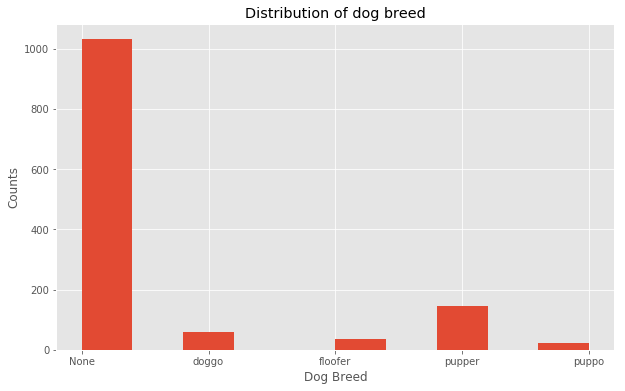

In [54]:
plt.style.use('ggplot');
fig, ax = plt.subplots(figsize =(10, 6));
twitter_archive_master.dog_stage.hist()
plt.xlabel('Dog Breed')
plt.ylabel('Counts')
plt.title('Distribution of dog breed');

#### Question 2: Which dog stage has the highest retweet and like

In [55]:
#group the dataset by dog stage and calculate the favorite_count ad the retweet_count for each stage
twitter_archive_master.groupby('dog_stage')['favorite_count'].sum(), twitter_archive_master.groupby('dog_stage')['retweet_count'].sum()

(dog_stage
 None       8360132
 doggo      1041276
 floofer     264071
 pupper     1110192
 puppo       506151
 Name: favorite_count, dtype: int64, dog_stage
 None       2478388
 doggo       404220
 floofer      82078
 pupper      366564
 puppo       135763
 Name: retweet_count, dtype: int64)

#### Insight 2:
> The pupper dog stage has the higest likes(favorite count) and the doggo dog stage has the highest retweet count.

#### Question 3: Does dog rating determine retweet_count and favourite count?

In [56]:
#Compute the correlation between rating_numerator and the counts.
twitter_archive_master.drop('rating_denominator', axis=1).corr()

,rating_numerator,favorite_count,retweet_count
rating_numerator,1.000000,0.443541,0.348946
favorite_count,0.443541,1.000000,0.855362
retweet_count,0.348946,0.855362,1.000000


#### Insight 3:
> There is a relatively small positive correlation between rating and  retweet_count & favourite count.

#### Visualization2:

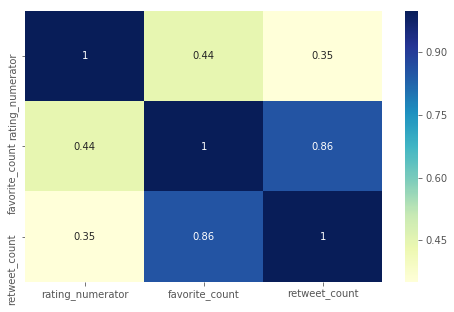

In [57]:
cor =twitter_archive_master.drop('rating_denominator', axis=1).corr()
plt.figure(figsize=(8, 5));
sns.heatmap(cor, cmap="YlGnBu", annot=True);

#### Question 4: Which source of tweet has the highest count.

In [58]:
twitter_archive_master.source.value_counts()

Twitter for iPhone    1278
Twitter Web Client      11
TweetDeck                6
Name: source, dtype: int64

#### Insight 4:
> Iphone users have the highest tweet count followed by Web Client

#### Visualization3:

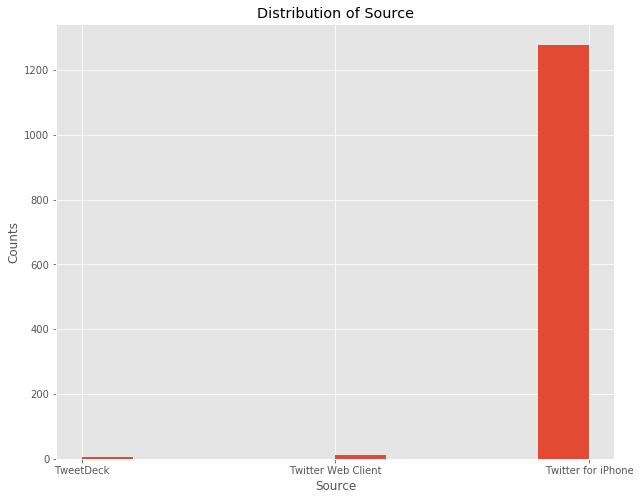

In [59]:
fig, ax = plt.subplots(figsize =(10, 8));
twitter_archive_master.source.hist()
plt.xlabel('Source')
plt.ylabel('Counts')
plt.title('Distribution of Source');

### Visualization

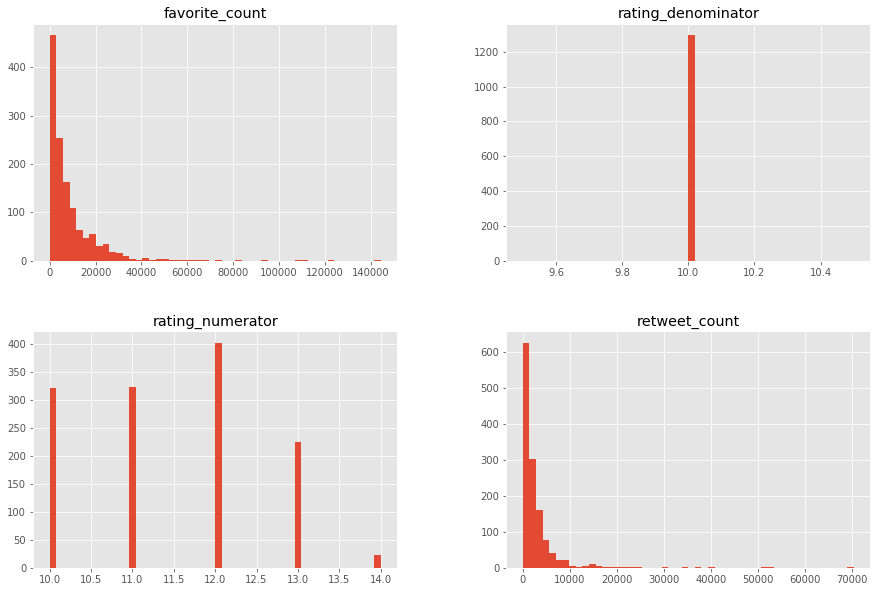

In [60]:
#Distribution of the twitter_archive_master dataset
twitter_archive_master.hist(figsize=(15,10), bins = 50);

#### Visualization of the relationship between Retweet count and favourite count

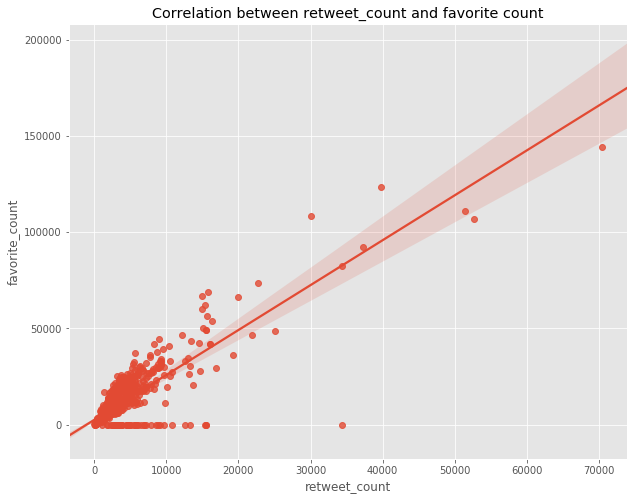

In [61]:
#Retweet count and favourite count
plt.figure(figsize=(10, 8));
sns.regplot(twitter_archive_master.retweet_count, twitter_archive_master.favorite_count);
plt.title('Correlation between retweet_count and favorite count');

#### Visualization of the relationship between Retweet count and rating numerator

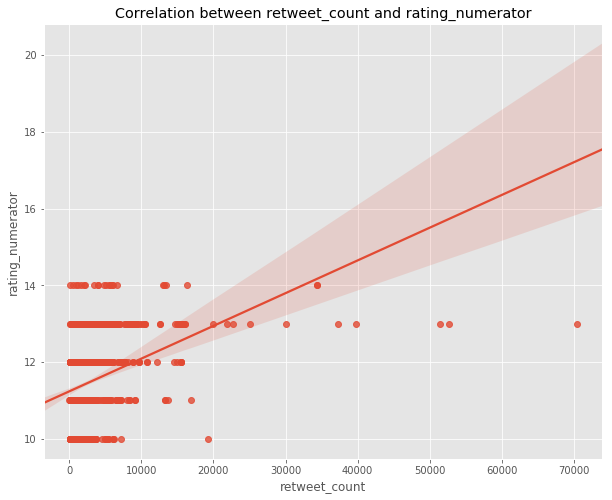

In [62]:
plt.figure(figsize=(10, 8));
sns.regplot(twitter_archive_master.retweet_count, twitter_archive_master.rating_numerator);
plt.title('Correlation between retweet_count and rating_numerator');

#### Visualization of the relationship between Favorite count and rating numerator

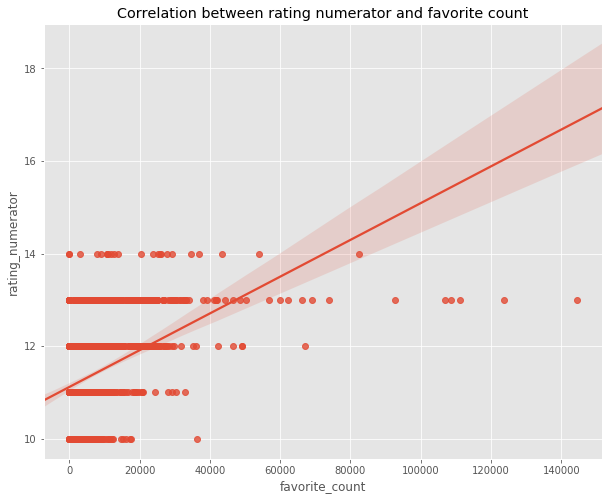

In [63]:
#rating numerator and favorite count
plt.figure(figsize=(10, 8));
sns.regplot(twitter_archive_master.favorite_count, twitter_archive_master.rating_numerator);
plt.title('Correlation between rating numerator and favorite count');

#### Insight:
* The distribution of Retweet count and favourite count is skewed to the right. 
* Retweet count and favourite count are highly positively correlated. 
* Retweet count and rating numerator are slightly positively correlated. 
* Favorite count and rating numerator are slightly positively correlated.

## Conclusion:
> The three dataset were succesfully gathered, assessed and cleaned. Also, some analysis and visualizations were made.

## References

https://stackoverflow.com/ <br/>
https://medium.com/ <br/>
https://www.geeksforgeeks.org/ <br/>
https://towardsdatascience.com/